In [3]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [72]:
IPL2018 = pd.read_excel('C:/Users/Jeet/Desktop/Cricket Analytics/IPL2018_results.xlsx')
IPL2018.head()

,scorecard_id,start_date,phase,stadium_name,home_team,away_team,toss_winner,toss_decision,innings1,wickets1,overs1,closure1,innings2,wickets2,overs2,closure2,adjusted_target_indicator,adjusted_target,team1_overs,team2_overs,mom_player_id,mom_player,scoring_status,result_type,result_margin,winning_team
0,1056637,43197,NaN,"Wankhede Stadium, Mumbai",Mumbai Indians,Chennai Super Kings,Chennai Super Kings,f,165,4,20.0,c,169,9,19.5,e,n,0,20.0,20,44613,DJ Bravo,live bbb,ww,1,Chennai Super Kings
1,1056638,43198,NaN,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Delhi Daredevils,Kings XI Punjab,f,166,7,20.0,c,167,4,18.5,e,n,0,20.0,20,170187,KL Rahul,live bbb,ww,6,Kings XI Punjab
2,1056639,43198,NaN,"Eden Gardens, Kolkata",Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,f,176,7,20.0,c,177,6,18.5,e,n,0,20.0,20,412485,N Rana,live bbb,ww,4,Kolkata Knight Riders
3,1056640,43199,NaN,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Sunrisers,Rajasthan Royals,Sunrisers,f,125,9,20.0,c,127,1,15.5,e,n,0,20.0,20,15627,S Dhawan,live bbb,ww,9,Sunrisers
4,1056641,43200,NaN,"MA Chidambaram Stadium, Chepauk, Chennai",Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,f,202,6,20.0,c,205,5,19.5,e,n,0,20.0,20,119895,SW Billings,live bbb,ww,5,Chennai Super Kings


In [73]:
print(IPL2018.columns.tolist())

['scorecard_id', 'start_date', 'phase', 'stadium_name', 'home_team', 'away_team', 'toss_winner', 'toss_decision', 'innings1', 'wickets1', 'overs1', 'closure1', 'innings2', 'wickets2', 'overs2', 'closure2', 'adjusted_target_indicator', 'adjusted_target', 'team1_overs', 'team2_overs', 'mom_player_id', 'mom_player', 'scoring_status', 'result_type', 'result_margin', 'winning_team']


#The distribution of runs scored

The variables we are interested in are the runs scored by each team, which are listed in "innings1" and "innings2". A histogram will show us the variation of runs scored. We specify the number of 'bins' - we use 10 bins here, which divides the data between the highest and lowest scores into ten equals ranges of 20 runs. The vertical axis then tells us the percentage of scores in innings1 in each data range.

array([[<Axes: title={'center': 'innings1'}>]], dtype=object)

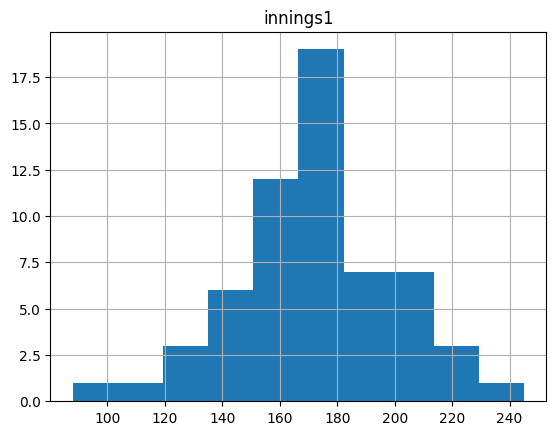

In [42]:
IPL2018.hist(column='innings1',bins=10)

array([[<Axes: title={'center': 'innings2'}>]], dtype=object)

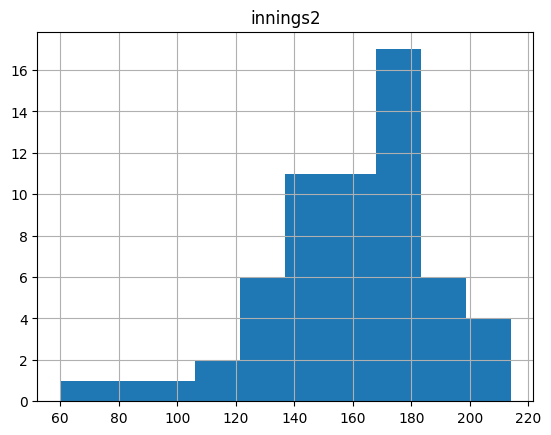

In [74]:
# now we generate the graph for innings2

IPL2018.hist(column='innings2', bins=10)

Comparing these two graphs it looks as if the scores in innings1 are skewed slightly to the left, and in innings2 slightly to the right. This could tell us something, but we should be careful. The x-axis for innings1 runs from 80 to 240, while for innings2 runs from 60 to 220. To compare, we really should specify that the x-axis has the same range for both sets of data. We do that in the next line:

(0.0, 20.0)

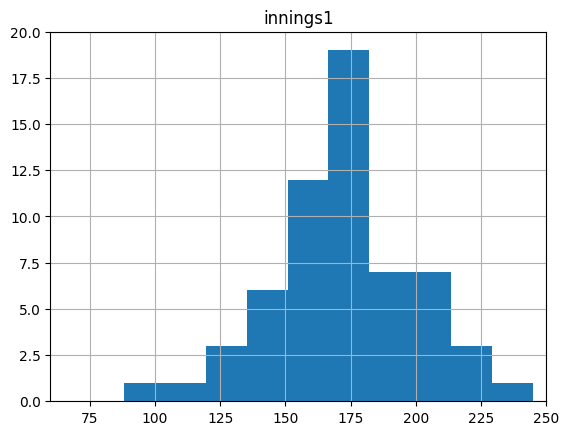

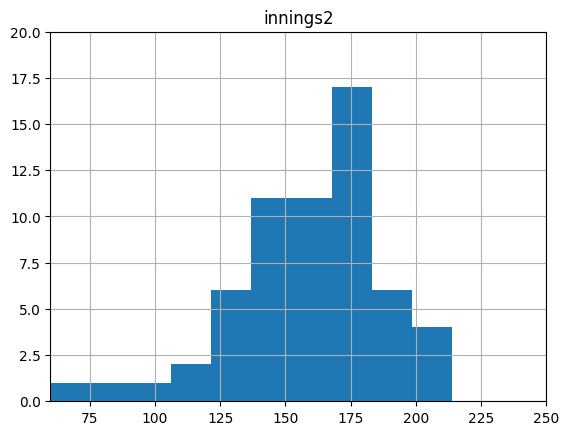

In [75]:
IPL2018.hist(column='innings1', bins=10)
plt.xlim((60, 250))
plt.ylim((0, 20))
IPL2018.hist(column='innings2', bins=10)
plt.xlim((60, 250))
plt.ylim((0, 20))


We can now see that the two innings have quite similar distributions centered around roughly the same median score. The two main differences are that the scores for innings2 seem truncated around the 200-215 mark. That is probably a result of the run chase effect - teams batting second either reach the required target and stop, or the target set in the first place was so high that the team batting second collapsed with a very low score.

(0.0, 20.0)

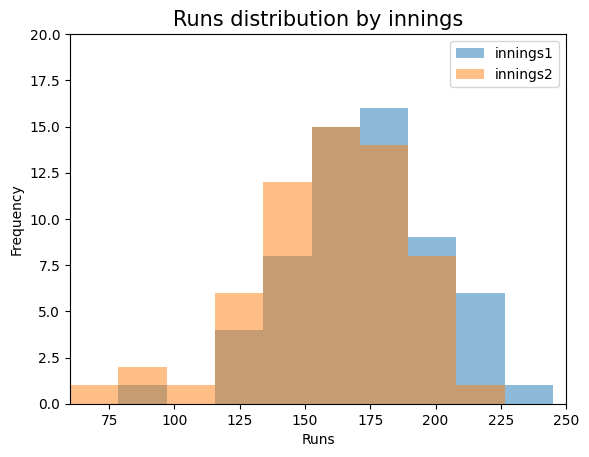

In [76]:
# We can show the two distributions on the same histogram.
# note that in addition to specifying the number of bins, we also specify alpha, which is the degree of transparency.

IPL2018[['innings1','innings2']].plot.hist(alpha=0.5,bins=10)
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.title("Runs distribution by innings", fontsize=15)
plt.xlim((60, 250))
plt.ylim((0, 20))

The distribution of runs scored by winning and losing teams
Having looked at the distributions comparing the team batting first and second, now let's compare the histograms for the teams that win and the teams that lose.

First, define winning and losing teams - which is derived by comparing the number of runs scored.

In [77]:
IPL2018['winscore']= np.where(IPL2018['innings1']>IPL2018['innings2'],IPL2018['innings1'],IPL2018['innings2'])
IPL2018['losescore'] = np.where(IPL2018['innings1']>IPL2018['innings2'],IPL2018['innings2'],IPL2018['innings1'])

(0.0, 20.0)

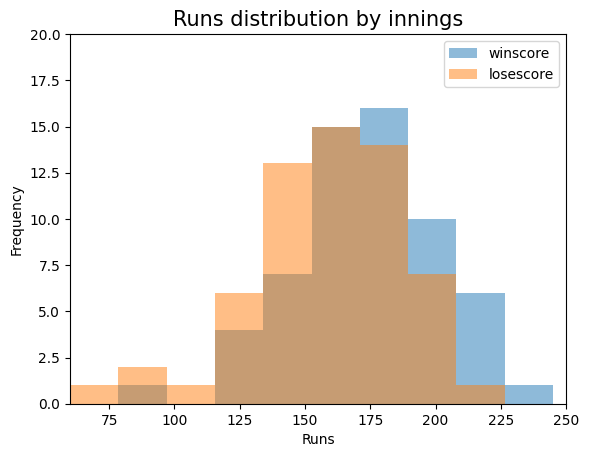

In [78]:
# Now we can plot two histograms together

IPL2018[['winscore','losescore']].plot.hist(alpha=.5,bins=10)
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.title("Runs distribution by innings", fontsize=15)
plt.xlim((60, 250))
plt.ylim((0, 20))

We can see that the winning score appears like a rightward shift of the losing score- which should not be surprising! For a low score, losing scores must outnumber winning scores, while for high scores, winning scores must outnumber losing scores.

#Run Accumulation and Wickets

We now look at a particular game, the opening game of the 2018 season between the Mumbai Indians (the reigning champions) and Chennai Super Kings, played in Mumbai on April 7, 2018. The file we now load contains a record of the game, ball by ball.

In [79]:
MI_CSK = pd.read_excel('C:/Users/Jeet/Desktop/Cricket Analytics/MIvCSKadj.xlsx')
print(MI_CSK.columns.tolist())
MI_CSK

['MI_over_no', 'MI_ball_no', 'MI_runs_total_end', 'MI_delivery_no', 'MI_wicket', 'CSK_over_no', 'CSK_ball_no', 'CSK_runs_total_end', 'CSK_delivery_no', 'CSK_wicket']


,MI_over_no,MI_ball_no,MI_runs_total_end,MI_delivery_no,MI_wicket,CSK_over_no,CSK_ball_no,CSK_runs_total_end,CSK_delivery_no,CSK_wicket
0,0.0,1.0,0.0,1.0,0.0,0,1,0,1,0
1,0.0,2.0,0.0,2.0,0.0,0,2,1,2,0
2,0.0,3.0,0.0,3.0,0.0,0,3,2,3,0
3,0.0,4.0,4.0,4.0,0.0,0,4,3,4,0
4,0.0,5.0,5.0,5.0,0.0,0,5,3,5,0
...,...,...,...,...,...,...,...,...,...,...
119,19.0,4.0,162.0,120.0,0.0,19,1,159,120,0
120,19.0,5.0,164.0,121.0,0.0,19,2,159,121,0
121,19.0,6.0,165.0,122.0,0.0,19,3,159,122,0
122,NaN,NaN,NaN,NaN,NaN,19,4,165,123,0


Runs_total_end refers to the number of runs scored by each team by the completion of a given delivery number. So we can now draw a linechart plotting the runs against delivery number for Mumbai, the team which batted first:

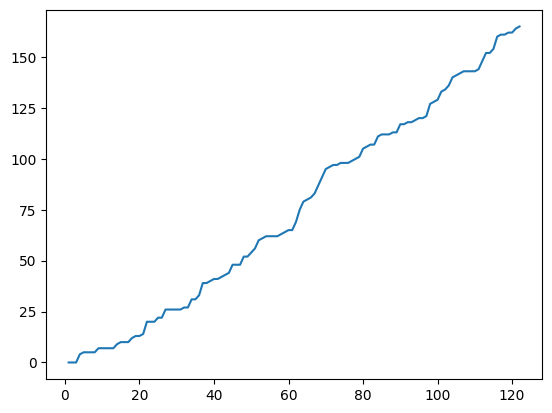

In [80]:
plt.plot(MI_CSK['MI_delivery_no'],MI_CSK['MI_runs_total_end'])

We can see from this chart that Mumbai maintained a steady pace throughout the inning - the score increases more or less linearly with the number of balls.

The next thing we want to do is incorporate the fall of wickets into the chart, to see how their batting resources changed as the inning progressed.

The "wicket" columns for each team tell us if a wicket fell on that delivery ('1') or not ('0'). We can create dfs as subsets of main df, to identify the delivery number and runs scored when the wicket fell.

In [81]:
MIwicket = MI_CSK[MI_CSK['MI_wicket']>0]
CSKwicket = MI_CSK[MI_CSK['CSK_wicket']>0]
MIwicket

,MI_over_no,MI_ball_no,MI_runs_total_end,MI_delivery_no,MI_wicket,CSK_over_no,CSK_ball_no,CSK_runs_total_end,CSK_delivery_no,CSK_wicket
12,2.0,1.0,7.0,13.0,1.0,2,1,16,13,0
23,3.0,6.0,20.0,24.0,1.0,3,6,31,24,0
75,12.0,3.0,98.0,76.0,1.0,12,2,76,76,0
88,14.0,4.0,113.0,89.0,1.0,14,3,103,89,0


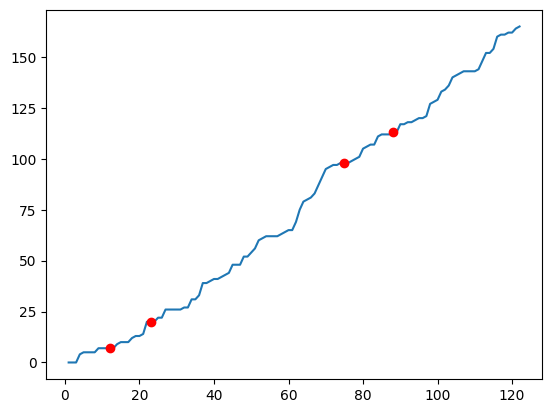

In [82]:
# We can now plot the fall of wickets alongside the runs total 
# note that we obtain the red dots for wickets by specifying 'ro' - 'r' for red and 'o' for circle dots

plt.plot(MI_CSK['MI_delivery_no'],MI_CSK['MI_runs_total_end'],MIwicket['MI_runs_total_end'], 'ro')

We can see from this that Mumbai made a realtively slow start, and lost two wickets early on. After that the innings stabilized, and then acclerated rapidly in the middle, only to slow down again after two more wickets fell. Some acceleration is also visible at the end of the innings.

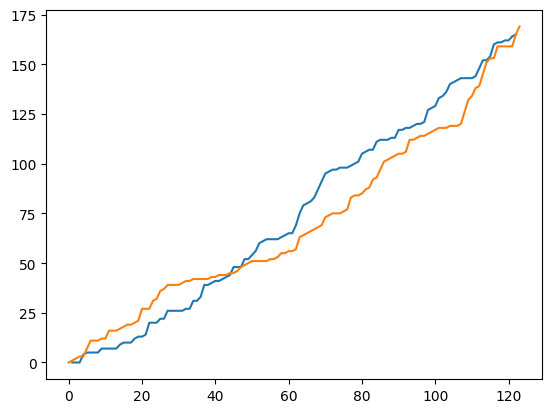

In [83]:
# we now combine the runs scored profile for Mumbai with Chennai's

plt.plot(MI_CSK['CSK_delivery_no'],MI_CSK['MI_runs_total_end'],MI_CSK['CSK_runs_total_end'])

We can see that Chennai's innings (in orange) progressed rather differently. Initially Chennai were well ahead of the pace set by Mumbai. However, Chennai slowed down considerably after about 25 deliveries, and were well behind Mumbai's scoring rate by mid-innings. Only at the end did Chennai accelerate, and overtake Mumbai's score to win the game.

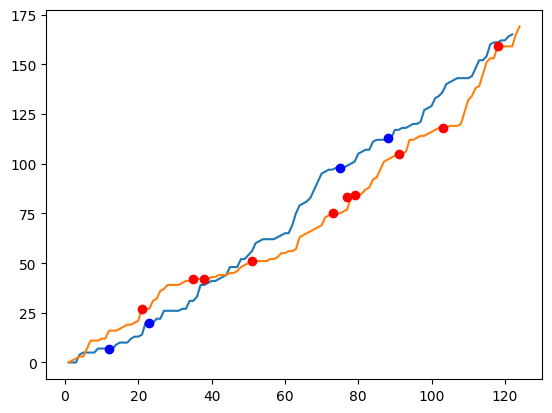

In [84]:
# We now plot the fall of wickets on the chart

plt.plot(MI_CSK['MI_delivery_no'],MI_CSK['MI_runs_total_end'],MIwicket['MI_runs_total_end'], 'bo')
plt.plot(MI_CSK['CSK_delivery_no'],MI_CSK['CSK_runs_total_end'],CSKwicket['CSK_runs_total_end'], 'ro')

We are now going to define two functions: one that will allow to create a comparable chart for any game, and another that will allow us to specify two games to compare.

We will encounter functions again, but for Python novices these take a while to become accustomed to. Rather than explain in detail here, we'll just run the functions to show what can be done.

In [5]:
IPLbyb = pd.read_excel('C:/Users/Jeet/Desktop/Cricket Analytics/IPLbyb.xlsx')
print(IPLbyb.columns.tolist())

['home team', 'batting_team', 'bowling_team', 'gameno', 'innings_number', 'over_no', 'ball_no', 'runs_total_end', 'delivery_no', 'delno^2', 'runs*wkts', 'wicket', 'wkts_total_end']


In [20]:
# First, the function for plotting the runs and wickets for each team in a game.

def plot_runs_wickets(IPLbyb, ax):
    gameno = IPLbyb['gameno'].unique()[0]
    for inning, data in IPLbyb.groupby('innings_number'):
        # create separate dataframe for wickets
        wicket = data[data['wicket'] > 0]
        # plots line
        ax.plot(data['delivery_no'],data['runs_total_end'])
        # plots markers
        marker = 'bo' if inning == 1 else 'ro'
        ax.plot(wicket['delivery_no'],wicket['runs_total_end'], marker)
        # labels
        ax.set_xlabel('balls')
        ax.set_ylabel('runs')
        ax.set_title(f'Game {gameno}')
    ax.legend(['runs1','wkt1','runs2','wkt2'])

In [18]:
# Second, a function that allows us to plot two or more games at the same time. 
def plot_runs_wickets_multi_game(list_games, team1_col='batting_team', team2_col='bowling_team'):
    n = len(list_games)
    fig, axs = plt.subplots(n, 1, figsize=(6, 15))
    
    for i, gameno in enumerate(list_games):
        game = IPLbyb[IPLbyb['gameno'] == gameno]
        team1 = game.iloc[0][team1_col]
        team2 = game.iloc[0][team2_col]
        
        plot_runs_wickets(game, axs[i] if n > 1 else axs)
        axs[i].set_title(f"Game {gameno}: {team1} vs {team2}")
        
    plt.tight_layout()



These functions will allow us to produce mutliple charts in order to display games alongside each other. Before we do that, though, we should generate a list of games, so we can decide which game's number refer to which teams. The code below generates a list for us. In our chart we'll see innings1 and innings2 as before. The next three lines of code creates a table which specifies the home team, the away team and and whether the home team batted first, so that the teams 1 and 2 can be identified for any game.



In [7]:
# Identify if the home team batted first

IPLbyb['hometeambatsfirst']= np.where((IPLbyb['home team']==IPLbyb['batting_team']) & (IPLbyb['innings_number']==1),'yes','no')
IPLbyb

,home team,batting_team,bowling_team,gameno,innings_number,over_no,ball_no,runs_total_end,delivery_no,delno^2,runs*wkts,wicket,wkts_total_end,hometeambatsfirst
0,Mumbai Indians,Mumbai Indians,Chennai Super Kings,1,1,0,1,0,1,1,0,0,0,yes
1,Mumbai Indians,Mumbai Indians,Chennai Super Kings,1,1,0,2,0,2,4,0,0,0,yes
2,Mumbai Indians,Mumbai Indians,Chennai Super Kings,1,1,0,3,0,3,9,0,0,0,yes
3,Mumbai Indians,Mumbai Indians,Chennai Super Kings,1,1,0,4,4,4,16,0,0,0,yes
4,Mumbai Indians,Mumbai Indians,Chennai Super Kings,1,1,0,5,5,5,25,0,0,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14281,Chennai Super Kings,Chennai Super Kings,Sunrisers,60,2,17,5,177,110,12100,354,0,2,no
14282,Chennai Super Kings,Chennai Super Kings,Sunrisers,60,2,17,6,177,111,12321,354,0,2,no
14283,Chennai Super Kings,Chennai Super Kings,Sunrisers,60,2,18,1,177,112,12544,354,0,2,no
14284,Chennai Super Kings,Chennai Super Kings,Sunrisers,60,2,18,2,177,113,12769,354,0,2,no


In [14]:
# drop duplicates so we just have a list of games

games = IPLbyb.drop_duplicates('gameno')

In [15]:
# generate list of games
# Select relevant columns
# generate list of games

games = games[['gameno','home team','batting_team','bowling_team','hometeambatsfirst']]
games['road team'] = games.apply(lambda x: x['batting_team'] if x['home team'] == x['bowling_team'] else x['bowling_team'], axis=1)
assert (games['home team'] != games['road team']).all()
games = games[['gameno','home team','road team','hometeambatsfirst']]
games


,gameno,home team,road team,hometeambatsfirst
0,1,Mumbai Indians,Chennai Super Kings,yes
246,2,Kings XI Punjab,Delhi Daredevils,no
484,3,Kolkata Knight Riders,Royal Challengers Bangalore,no
728,4,Sunrisers,Rajasthan Royals,no
953,5,Chennai Super Kings,Kolkata Knight Riders,no
1199,6,Rajasthan Royals,Delhi Daredevils,yes
1345,7,Sunrisers,Mumbai Indians,no
1590,8,Royal Challengers Bangalore,Kings XI Punjab,no
1827,9,Mumbai Indians,Delhi Daredevils,yes
2073,10,Kolkata Knight Riders,Sunrisers,yes


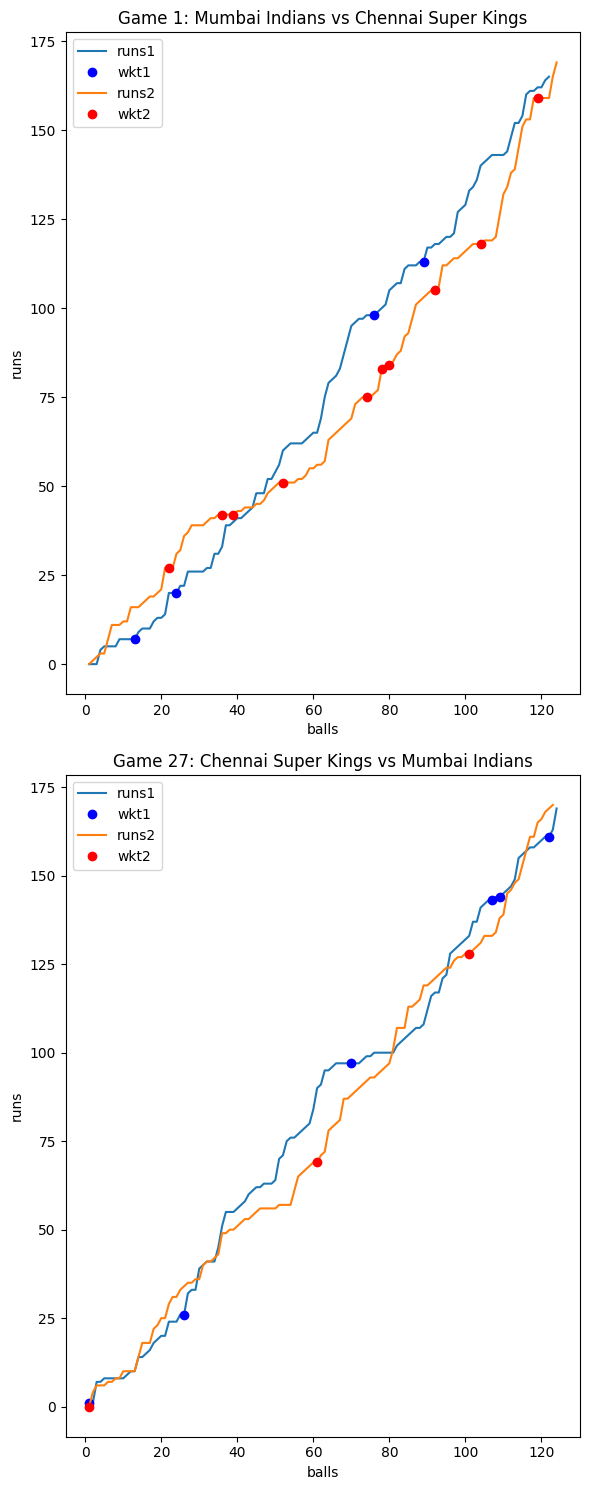

In [21]:
# Inside the square brackets we can type in game numbers, separated by a comma, to specify the games we want to compare

plot_runs_wickets_multi_game([1, 27])

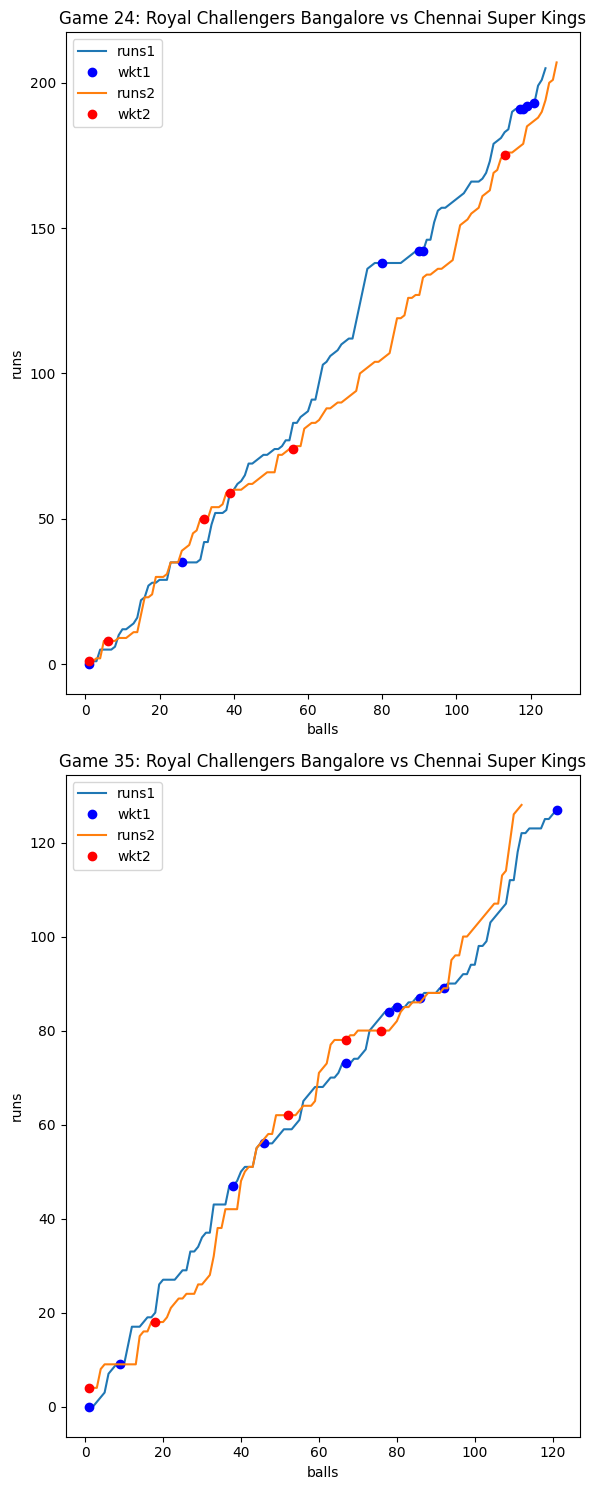

In [22]:
plot_runs_wickets_multi_game([24,35])